<a href="https://colab.research.google.com/github/kevinalgazali1/TugasPDS/blob/main/Tugas2PDS_H071221060_Kevin_Al_Gazali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# memuat data
data = pd.read_csv("brca.csv")
data.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [ ]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:20]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [ ]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs         Score
4          x.area_mean  53991.655924
0           Unnamed: 0  37775.610526
14           x.area_se   8758.504705
3     x.perimeter_mean   2011.102864
1        x.radius_mean    266.104917
13      x.perimeter_se    250.571896
2       x.texture_mean     93.897508
11         x.radius_se     34.675247
7     x.concavity_mean     19.712354
8   x.concave_pts_mean     10.544035


In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
# memuat data
data = pd.read_csv("brca.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [ ]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.2441512  0.07858162 0.02475681 0.09763648 0.06892051 0.01392848
 0.04110372 0.08294549 0.14533127 0.00883481 0.0074826  0.03076698
 0.00766847 0.03910712 0.05818255 0.00681639 0.00757412 0.00876468
 0.01817348 0.00927321]


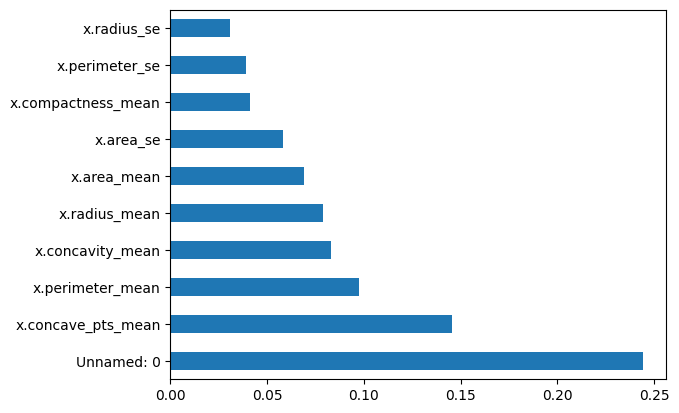

In [ ]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# memuat data
data = pd.read_csv("brca.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [ ]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr(numeric_only=True)
top_corr_features = corrmat.index

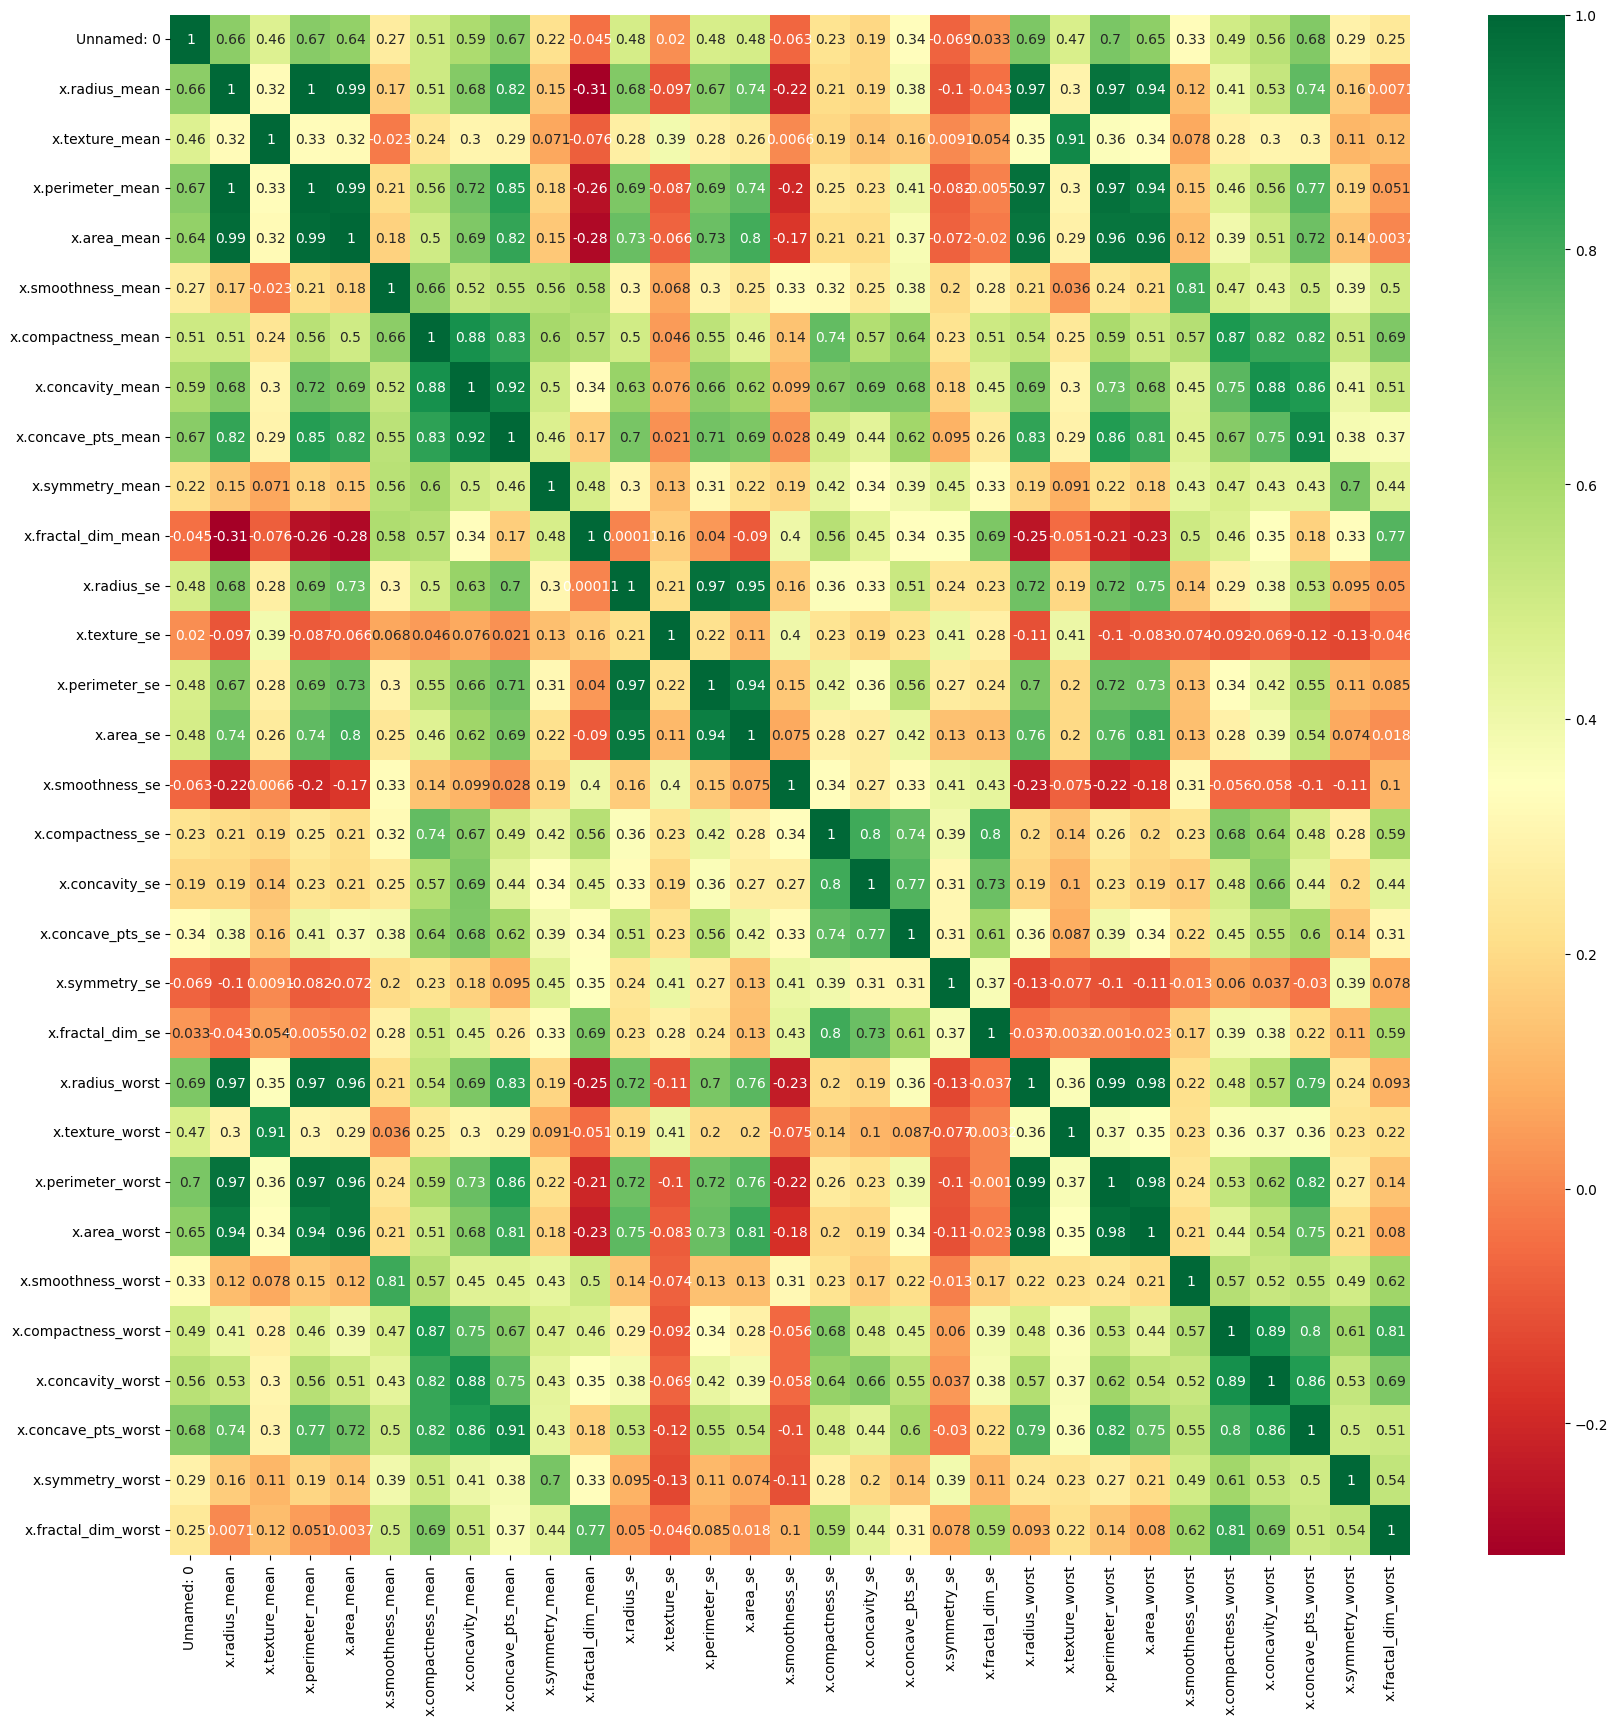

In [ ]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Kesimpulan



Korelasi antara xfractal_dim_worst berelasi positif dengan variabel x.ccompactness dan x.factal_dim_mean

Sedangkan berkolerasi rendah dengan variabel x.texture_se